## Standardization

In [1]:
# Importing libraries and dataset
import numpy as np  # for simple vector manipulation and operatoions
import pandas as pd # for dataframe manipulation and describing the data
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Probability density function plots
from sklearn.datasets import fetch_california_housing #california_housing_dataset
from sklearn.model_selection import train_test_split # train_test_split the dataset

In [2]:
#Lets load the dataset into a dataframe
house = fetch_california_housing()
house_data = pd.DataFrame(data=house.data,
                          columns= house.feature_names)
house_data['MedValue'] = house.target
house_data.head() # display the top 5 values of the Dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#Subtracting the mean and dividing by standard deviation
mean_df = np.mean(house_data_scaled, axis=0) # Computing the variable wise mean
std_dev_df = np.std(house_data_scaled, axis=0) # Computing the variable wise standard_deviation
house_data_scaled = (house_data_scaled-mean_df)/std_dev_df #Standardization.

In [5]:
# describing the orginal dataframe
np.round(house_data_scaled.describe(),1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.8,-2.2,-1.9,-1.6,-1.3,-0.2,-1.4,-2.4,-1.7
25%,-0.7,-0.8,-0.4,-0.2,-0.6,-0.1,-0.8,-1.1,-0.8
50%,-0.2,0.0,-0.1,-0.1,-0.2,-0.0,-0.6,0.5,-0.2
75%,0.5,0.7,0.3,0.0,0.3,0.0,1.0,0.8,0.5
max,5.9,1.9,55.2,69.6,30.3,119.4,3.0,2.6,2.5


In [6]:
# importing the StandardScaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(house_data,
                                         house_data['MedValue'],
                                        test_size=0.3,
                                        random_state=42)

In [7]:
# Fit the dataset
standard_scaler.fit(X_train)
# Scale the dataset
X_train_scaled = standard_scaler.transform(X_train) # Transform to scaled version.

X_train_scaled1 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
np.round(X_train_scaled1.describe(),1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0
mean,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.8,-2.2,-1.9,-1.7,-1.2,-0.2,-1.5,-2.4,-1.7
25%,-0.7,-0.8,-0.4,-0.2,-0.6,-0.1,-0.8,-1.1,-0.8
50%,-0.2,0.0,-0.1,-0.1,-0.2,-0.0,-0.6,0.5,-0.2
75%,0.5,0.7,0.3,0.0,0.3,0.0,1.0,0.8,0.5
max,5.8,1.9,55.6,54.8,30.0,100.2,2.9,2.6,2.5


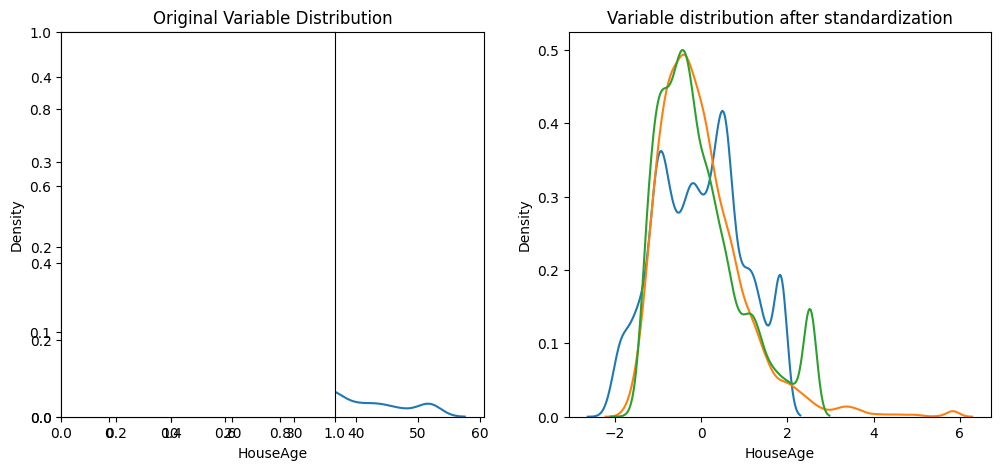

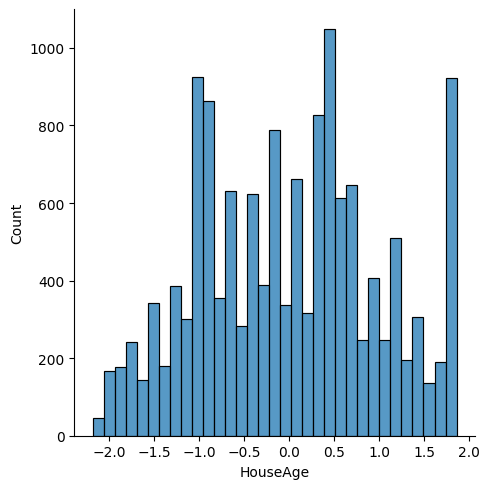

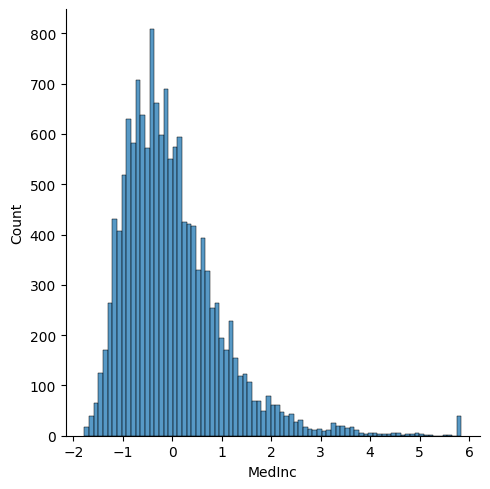

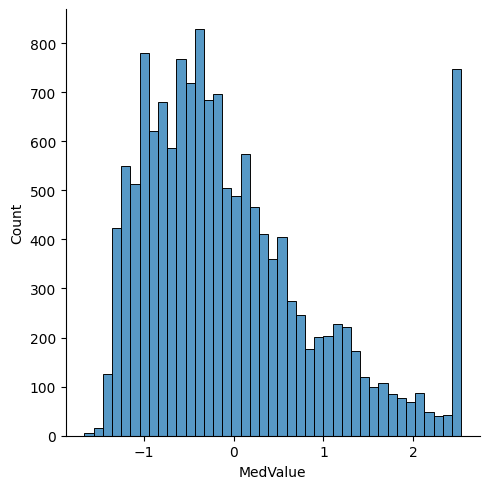

In [15]:
## Plotting the probability distribution of the variables
def show_plots(X_scaled, title):
    plt.figure(figsize=(12,5))

    plt.subplot(121)
    plt.title('Original Variable Distribution')
    sns.kdeplot(X_train['HouseAge'])
    sns.kdeplot(X_train['MedInc'])
    sns.kdeplot(X_train['MedValue'])

    plt.subplot(122)
    plt.title(title)
    sns.kdeplot(X_scaled['HouseAge'])
    sns.kdeplot(X_scaled['MedInc'])
    sns.kdeplot(X_scaled['MedValue'])

    plt.subplot(131)
    sns.displot(X_scaled['HouseAge'])
    sns.displot(X_scaled['MedInc'])
    sns.displot(X_scaled['MedValue'])

show_plots(X_train_scaled1, 'Variable distribution after standardization')

## Min-Max Scaling

In [16]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#Subtracting the min and dividing by difference of max and min
max_df = np.max(house_data_scaled, axis=0) # Computing the variable wise maximum value
min_df = np.min(house_data_scaled, axis=0) # Computing the variable wise minimum value
house_data_scaled = (house_data_scaled-min_df)/(max_df-min_df) #MinMax scaling

In [17]:
np.round(house_data_scaled.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,0.2,0.5,0.0,0.0,0.0,0.0,0.3,0.5,0.4
std,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.3,0.0,0.0,0.0,0.0,0.1,0.3,0.2
50%,0.2,0.5,0.0,0.0,0.0,0.0,0.2,0.6,0.3
75%,0.3,0.7,0.0,0.0,0.0,0.0,0.5,0.6,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(0,1))

# Fit the dataset
minmax_scaler.fit(X_train)
# Scale the dataset
X_train_scaled = minmax_scaler.transform(X_train) # Transform to scaled version.

X_train_scaled2 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

np.round(X_train_scaled2.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0
mean,0.2,0.5,0.0,0.0,0.0,0.0,0.3,0.5,0.4
std,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.3,0.0,0.0,0.0,0.0,0.1,0.3,0.2
50%,0.2,0.5,0.0,0.0,0.0,0.0,0.2,0.6,0.3
75%,0.3,0.7,0.0,0.0,0.0,0.0,0.6,0.6,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


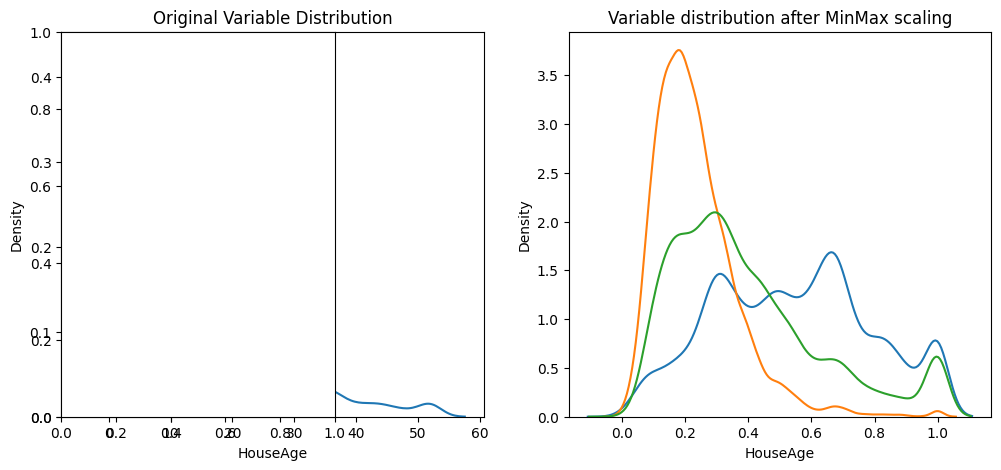

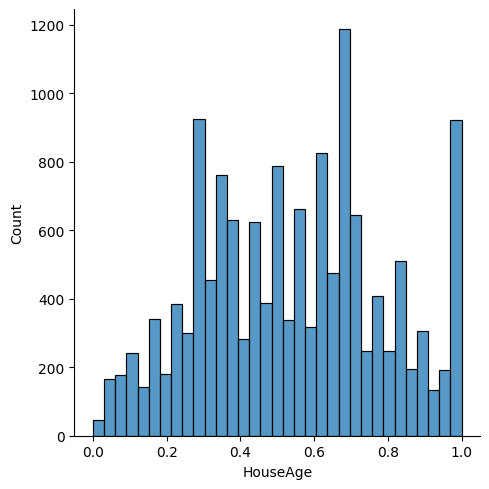

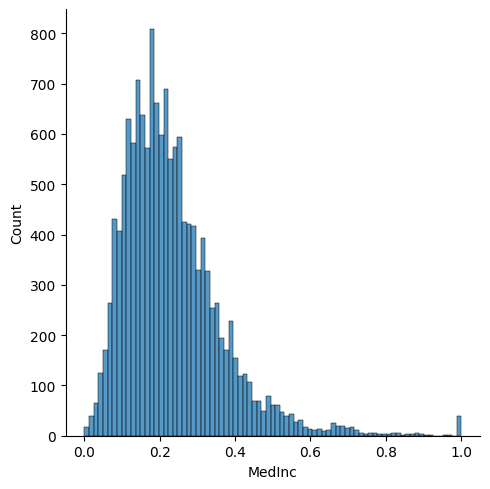

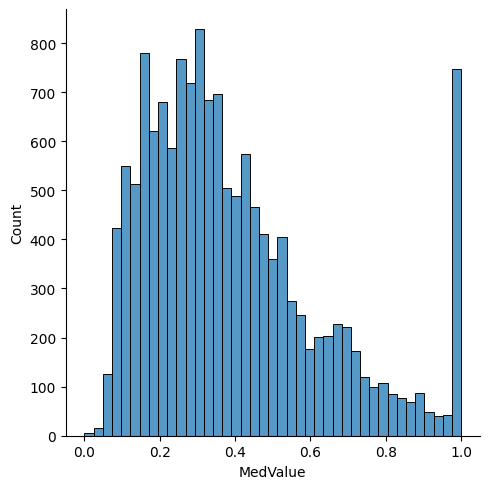

In [19]:
show_plots(X_train_scaled2,'Variable distribution after MinMax scaling')

## Robust scaling

In [20]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#Subtracting the median and dividing by IQR
median_df = np.median(house_data_scaled, axis=0) # Computing the variable wise median
first_quartile_df = np.quantile(house_data_scaled, q=0.25, axis=0) # Computing the variable wise 25th percentile
third_quartile_df = np.quantile(house_data_scaled, q=0.75, axis=0) # Computing the variable wise 75th percentile
house_data_scaled = (house_data_scaled-median_df)/(third_quartile_df-first_quartile_df) #Robust scaling.

In [21]:
print(np.round(house_data_scaled.median(),1))
np.round(house_data_scaled.describe(), 1)

MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
MedValue      0.0
dtype: float64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,0.2,-0.0,0.1,0.5,0.3,0.3,0.4,-0.3,0.2
std,0.9,0.7,1.5,5.1,1.2,12.2,0.6,0.5,0.8
min,-1.4,-1.5,-2.7,-7.7,-1.2,-2.5,-0.5,-1.5,-1.1
25%,-0.4,-0.6,-0.5,-0.5,-0.4,-0.5,-0.1,-0.9,-0.4
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.6,0.4,0.5,0.5,0.6,0.5,0.9,0.1,0.6
max,5.3,1.2,84.8,353.3,36.8,1455.1,2.0,1.1,2.2


In [22]:
# importing the RobustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

# Fit the dataset
robust_scaler.fit(X_train)
# Scale the dataset
X_train_scaled = robust_scaler.transform(X_train) # Transform to scaled version.

X_train_scaled3 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

np.round(X_train_scaled3.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0
mean,0.2,-0.0,0.1,0.5,0.3,0.4,0.4,-0.3,0.2
std,0.9,0.7,1.5,4.8,1.2,14.6,0.6,0.5,0.8
min,-1.4,-1.5,-2.7,-7.7,-1.2,-2.5,-0.5,-1.5,-1.1
25%,-0.4,-0.6,-0.5,-0.5,-0.4,-0.5,-0.1,-0.9,-0.4
50%,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
75%,0.6,0.4,0.5,0.5,0.6,0.5,0.9,0.1,0.6
max,5.2,1.2,84.8,262.8,36.9,1461.6,2.0,1.1,2.2


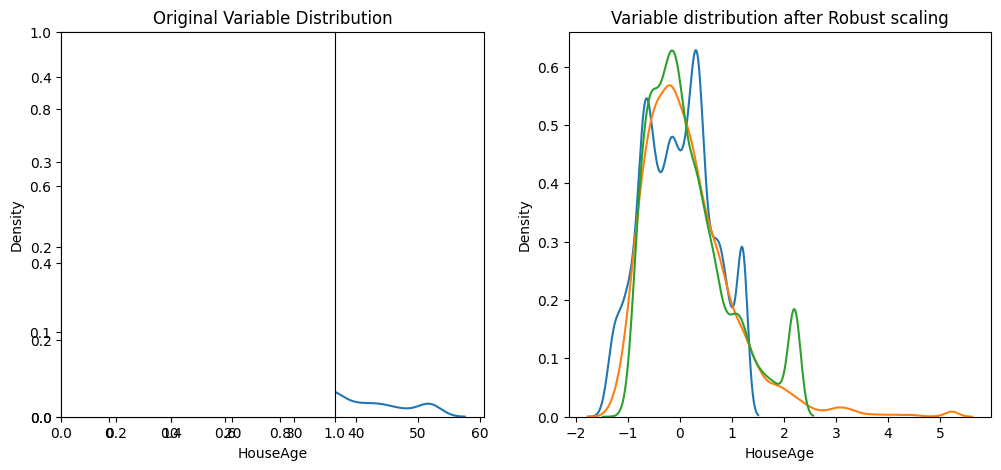

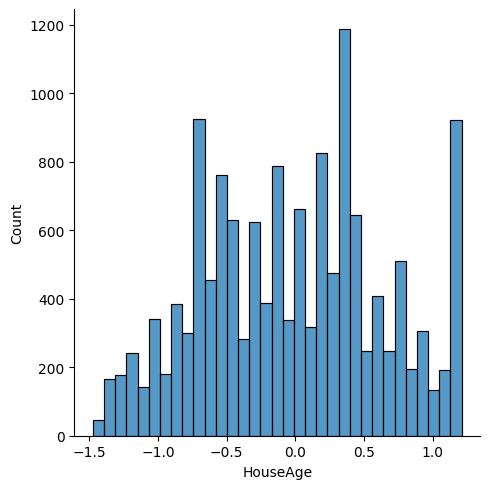

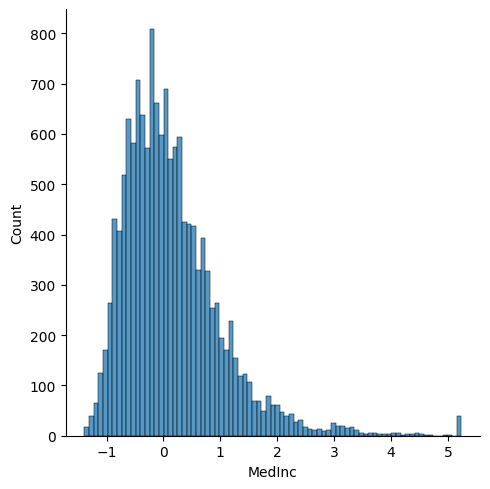

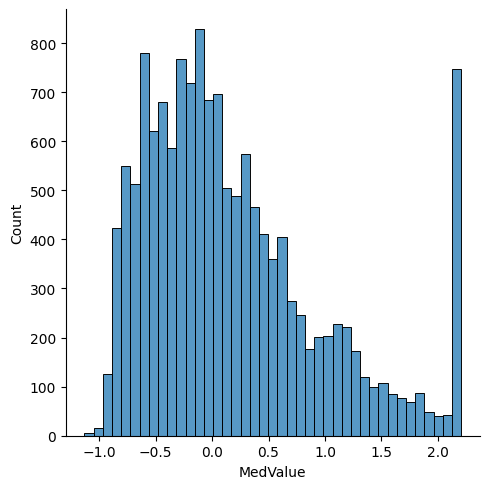

In [23]:
show_plots(X_train_scaled3, 'Variable distribution after Robust scaling')

## Maximum absolute scaling

In [24]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#dividing by maximum value
house_data_scaled = house_data_scaled/max_df #MaxAbs scaling.

In [25]:
np.round(house_data_scaled.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,0.3,0.6,0.0,0.0,0.0,0.0,0.8,1.0,0.4
std,0.1,0.2,0.0,0.0,0.0,0.0,0.1,0.0,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0
25%,0.2,0.3,0.0,0.0,0.0,0.0,0.8,1.0,0.2
50%,0.2,0.6,0.0,0.0,0.0,0.0,0.8,1.0,0.4
75%,0.3,0.7,0.0,0.0,0.0,0.0,0.9,1.1,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.1,1.0


In [26]:
# importing the RobustScaler
from sklearn.preprocessing import MaxAbsScaler

maxabs_scaler = MaxAbsScaler()

# Fit the dataset
maxabs_scaler.fit(X_train)
# Scale the dataset
X_train_scaled = maxabs_scaler.transform(X_train) # Transform to scaled version.

X_train_scaled4 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

np.round(X_train_scaled4.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0
mean,0.3,0.5,0.0,0.0,0.0,0.0,0.8,-1.0,0.4
std,0.1,0.2,0.0,0.0,0.0,0.0,0.1,0.0,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.8,-1.0,0.0
25%,0.2,0.3,0.0,0.0,0.0,0.0,0.8,-1.0,0.2
50%,0.2,0.6,0.0,0.0,0.0,0.0,0.8,-1.0,0.4
75%,0.3,0.7,0.0,0.0,0.0,0.0,0.9,-0.9,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.9,1.0


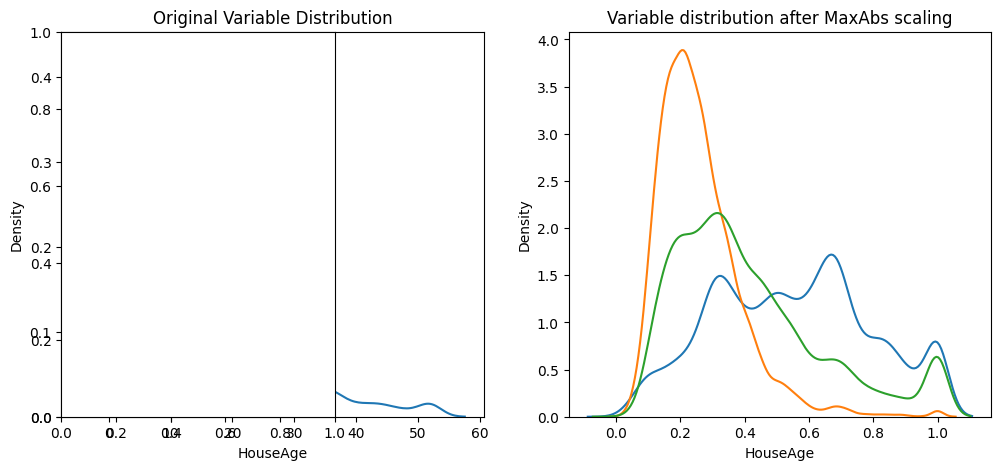

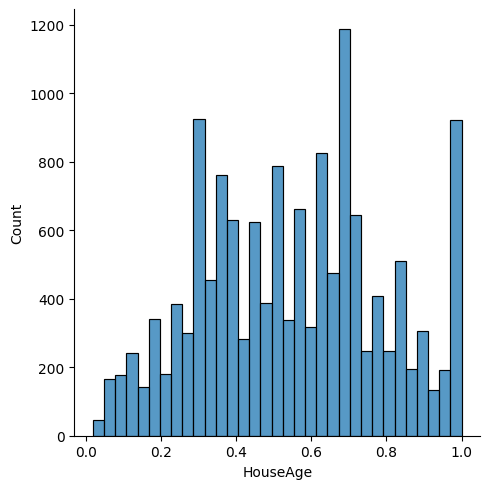

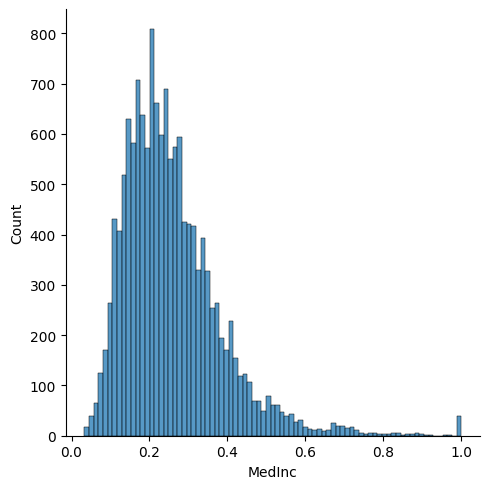

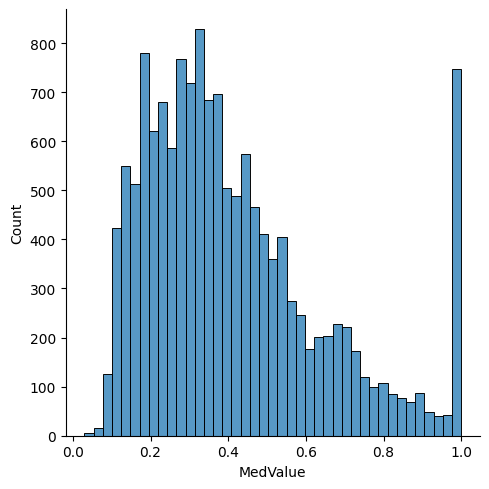

In [27]:
show_plots(X_train_scaled4, 'Variable distribution after MaxAbs scaling')

## Mean normalization

In [28]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#Subtracting the mean and dividing by difference of max and min
house_data_scaled = (house_data_scaled-mean_df)/(max_df-min_df) #Mean Normalization scaling.

np.round(house_data_scaled.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
std,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2
min,-0.2,-0.5,-0.0,-0.0,-0.0,-0.0,-0.3,-0.5,-0.4
25%,-0.1,-0.2,-0.0,-0.0,-0.0,-0.0,-0.2,-0.2,-0.2
50%,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.1,0.1,-0.1
75%,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.1
max,0.8,0.5,1.0,1.0,1.0,1.0,0.7,0.5,0.6


In [29]:
# Initialize StandardScaler so that it removes the mean only.
scaler_with_mean = StandardScaler(with_mean=True, with_std=False)

# Initialize RobustScaler such that there is only scaling with 0th and 100th quantile
scaler_with_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

scaler_with_mean.fit(X_train)
scaler_with_minmax.fit(X_train)

# Scale the dataset
X_train_scaled = scaler_with_minmax.transform(scaler_with_mean.transform(X_train))
X_train_scaled6 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

np.round(X_train_scaled6.describe(),1)

c:\Users\Dell\OneDrive\Desktop\KaranCodes\Goal-to-be-ML-Engineer-2026\Machine-Learning-Portfolio\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0
mean,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
std,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2
min,-0.2,-0.5,-0.0,-0.0,-0.0,-0.0,-0.3,-0.5,-0.4
25%,-0.1,-0.2,-0.0,-0.0,-0.0,-0.0,-0.2,-0.2,-0.2
50%,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.1,0.1,-0.1
75%,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.1
max,0.8,0.5,1.0,1.0,1.0,1.0,0.7,0.5,0.6


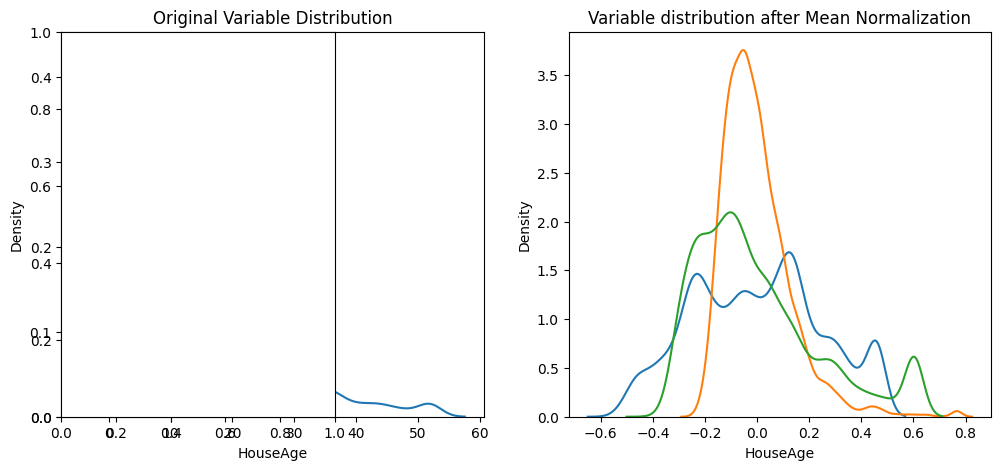

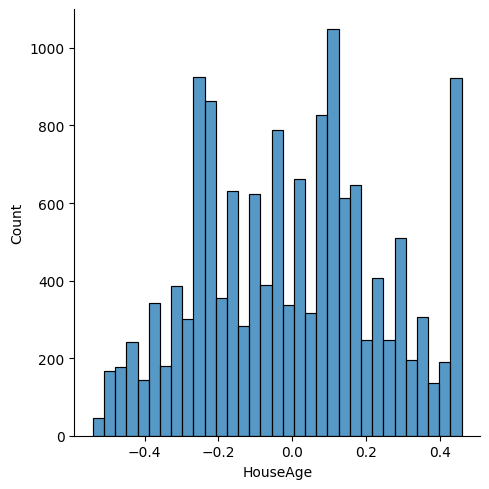

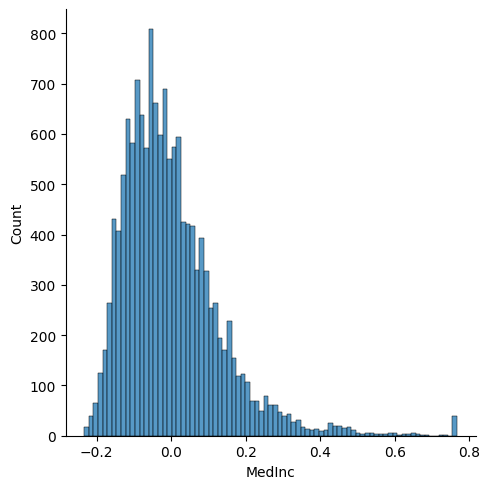

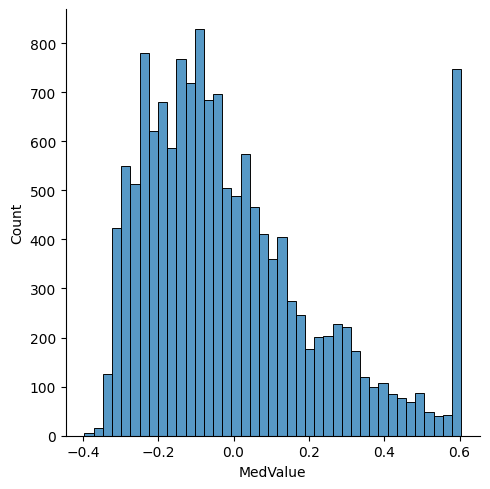

In [30]:
show_plots(X_train_scaled6, 'Variable distribution after Mean Normalization')

## Scaling to vector unit norm

In [31]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#computing the norms
l1_norm = np.linalg.norm(house_data_scaled, ord=1, axis=1, keepdims=True) #Manhattan distance
l2_norm = np.linalg.norm(house_data_scaled, ord=2, axis=1, keepdims=True) #Euclidean distance

#Dividing the values with norm
house_data_scaled_l1_norm = house_data_scaled/l1_norm
house_data_scaled_l2_norm = house_data_scaled/l2_norm

In [32]:
# norm before l1 scaling
np.linalg.norm(house_data_scaled, ord=1, axis=1, keepdims=True)

array([[ 546.52469206],
       [2603.2862594 ],
       [ 731.03224181],
       ...,
       [1195.92427021],
       [ 931.08884183],
       [1575.92656226]], shape=(20640, 1))

In [33]:
# norm after l1 scaling
np.linalg.norm(house_data_scaled_l1_norm, ord=1, axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], shape=(20640, 1))

In [34]:
# norm before l2 scaling
np.linalg.norm(house_data_scaled, ord=2, axis=1, keepdims=True)

array([[ 349.12206749],
       [2404.52473138],
       [ 515.01262658],
       ...,
       [1015.19678688],
       [ 752.14144698],
       [1392.95242225]], shape=(20640, 1))

In [35]:
np.linalg.norm(house_data_scaled_l2_norm, ord=2, axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], shape=(20640, 1))

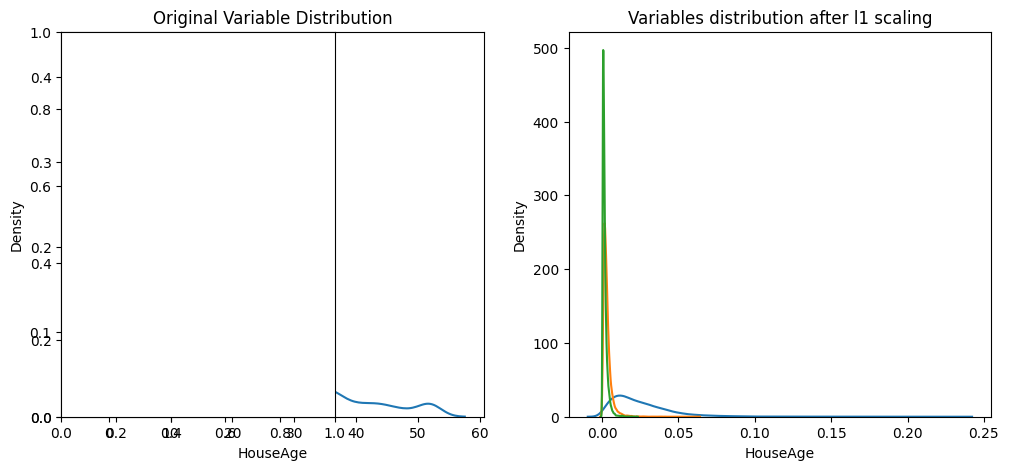

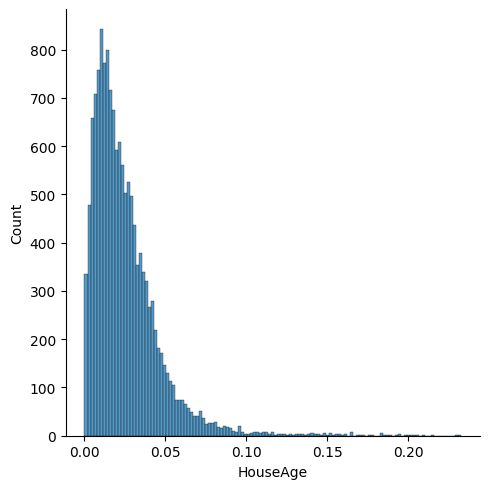

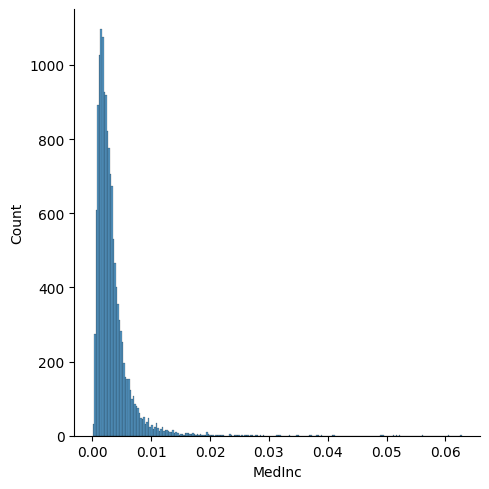

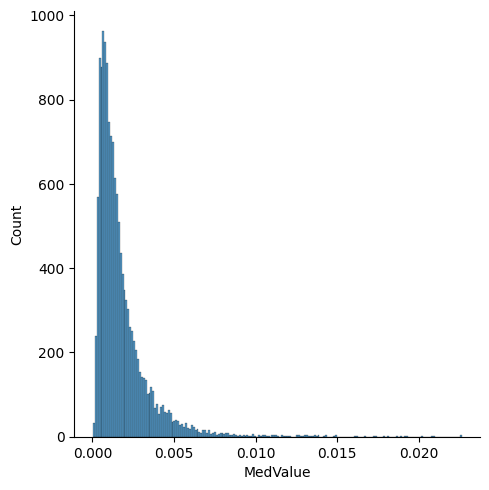

In [36]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Initializing l1 and l2 scalers

l1_scaler = Normalizer(norm='l1')
l2_scaler = Normalizer(norm='l2')

# Applying scaling with vector unit norm with norm=l1
l1_scaler.fit(X_train)
X_train_scaled = l1_scaler.transform(X_train)
X_train_scaled7 = pd.DataFrame(X_train_scaled, columns=X_train.columns)

show_plots(X_train_scaled7, 'Variables distribution after l1 scaling')

<Axes: title={'center': 'Variable distribution after l1 scaling'}, xlabel='HouseAge', ylabel='Density'>

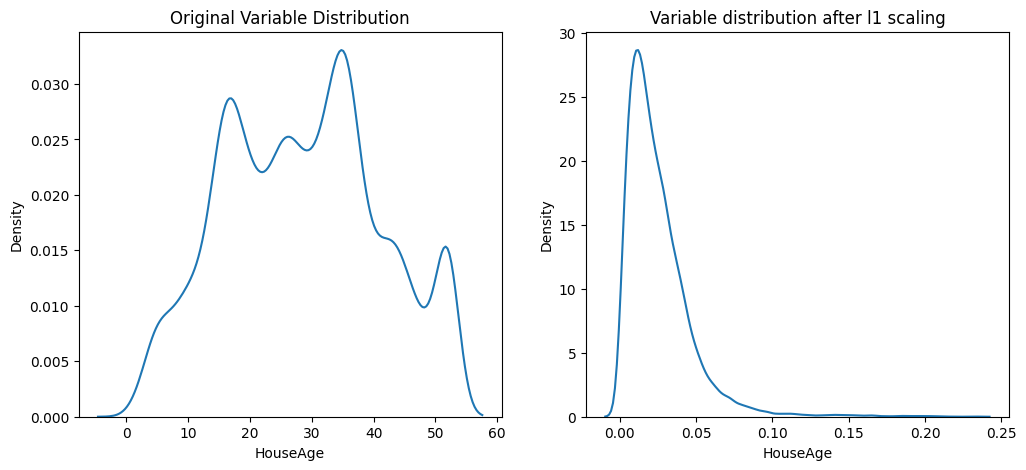

In [37]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('Original Variable Distribution')
sns.kdeplot(X_train['HouseAge'])

plt.subplot(122)
plt.title('Variable distribution after l1 scaling')
sns.kdeplot(X_train_scaled7['HouseAge'])

- this scaling seems to heavily change variable after scaling so not used for classification and regression tasks.

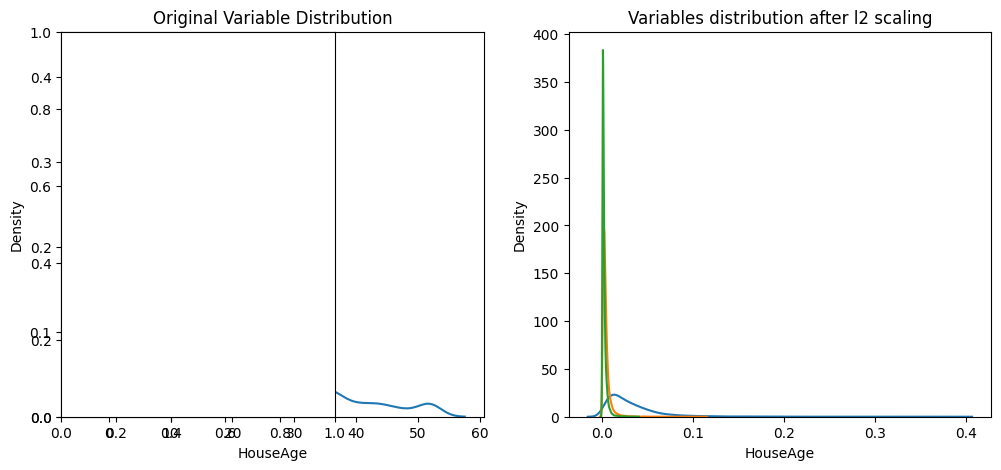

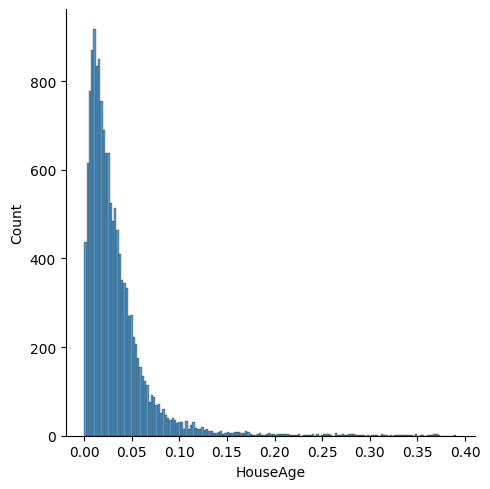

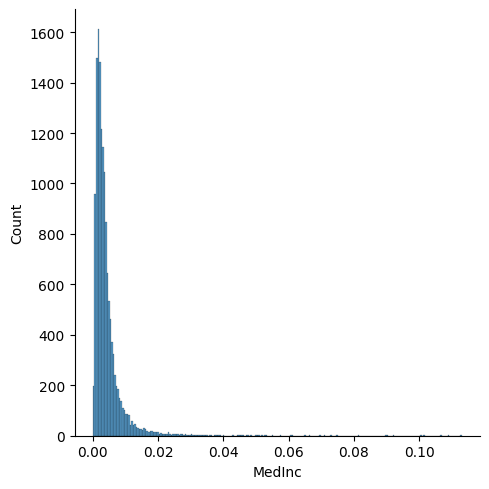

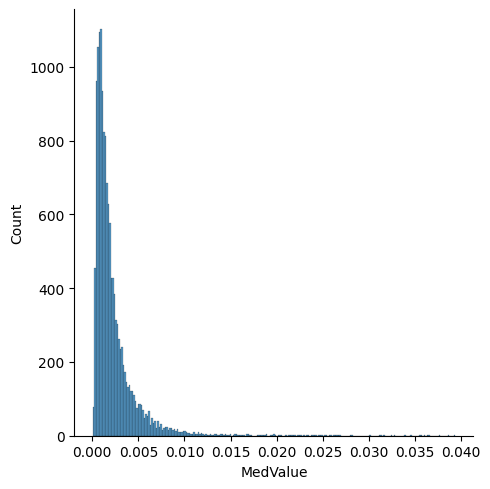

In [38]:
l2_scaler.fit(X_train)
X_train_scaled = l2_scaler.transform(X_train)
X_train_scaled8 = pd.DataFrame(X_train_scaled, columns=X_train.columns)
show_plots(X_train_scaled8, 'Variables distribution after l2 scaling')

<Axes: title={'center': 'Variable distribution after l2 scaling'}, xlabel='HouseAge', ylabel='Density'>

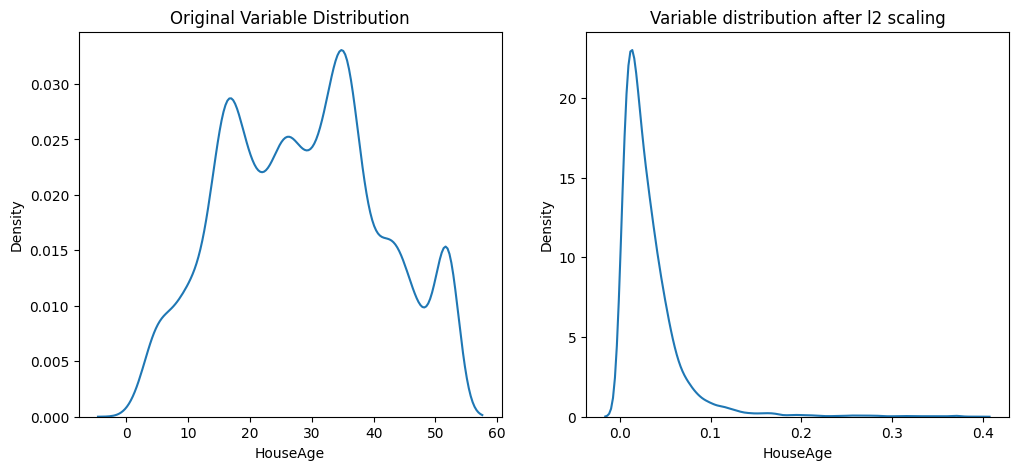

In [39]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('Original Variable Distribution')
sns.kdeplot(X_train['HouseAge'])

plt.subplot(122)
plt.title('Variable distribution after l2 scaling')
sns.kdeplot(X_train_scaled8['HouseAge'])